In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [2]:
dataset='bone_tumor'

from loader import DataLoader
dl = DataLoader()
primitive_matrix, ground = dl.load_data(dataset=dataset)

In [3]:
#TODO formalize
train_primitive_matrix = primitive_matrix[0:400,:]
train_ground = ground[0:400]

val_primitive_matrix = primitive_matrix[400:600,:]
val_ground = ground[400:600]

## Synthesize Heuristics

In [28]:
from program_synthesis.synthesizer import Synthesizer
syn = Synthesizer(val_primitive_matrix, val_ground)

In [29]:
hf, feat_combos = syn.generate_heuristics(cardinality=2)

#optional pruning
sort_idx = syn.prune_heuristics(hf,feat_combos, keep=10)
hf = [hf[i] for i in sort_idx]
feat_combos = [feat_combos[i] for i in sort_idx]

In [30]:
X_train = train_primitive_matrix[:,feat_combos]
L_train = syn.apply_heuristics(hf,X_train)

X_val = val_primitive_matrix[:,feat_combos]
L_val = syn.apply_heuristics(hf,X_val)

## Verify Heuristics

In [31]:
from program_synthesis.verifier import Verifier
vf = Verifier(L_train, L_val, val_ground)

In [32]:
vf.train_gen_model()
vf.gen_model.learned_lf_stats()

Inferred cardinality: 2


,Accuracy,Coverage,Precision,Recall
0,0.920793,0.7916,0.935788,0.728275
1,0.906660,0.7778,0.916029,0.703472
2,0.932859,0.8013,0.943577,0.743524
3,0.931692,0.7920,0.940410,0.742238
4,0.929202,0.7924,0.941038,0.733052
5,0.885755,0.7659,0.904103,0.672056
6,0.933484,0.7983,0.940959,0.749587
7,0.902909,0.7735,0.915409,0.701819
8,0.875903,0.7478,0.891798,0.657174
9,0.930996,0.7985,0.939944,0.741870


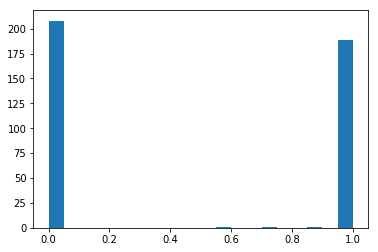

In [33]:
vf.assign_marginals()
plt.hist(vf.train_marginals, bins=20)
plt.show()

In [34]:
vague_idx = vf.find_vague_points(b=0.6, thresh=0.2)
incorrect_idx = vf.find_incorrect_points(b=0.6)
#TODO call the function, print TP/FP/F1/P/R etc in pandas format
1-np.shape(incorrect_idx)[0]/float(np.shape(val_ground)[0])

0.745

## Re-Synthesize Labeling Functions

In [35]:
special_idx = list(set(list(np.concatenate((vague_idx,incorrect_idx)))))

In [36]:
syn = Synthesizer(val_primitive_matrix[special_idx,:], val_ground[special_idx])

In [37]:
hf, feat_combos = syn.generate_heuristics(cardinality=1)

In [38]:
#optional pruning
sort_idx = syn.prune_heuristics(hf,feat_combos, keep=5)
hf = [hf[i] for i in sort_idx]
feat_combos = [feat_combos[i] for i in sort_idx]

In [39]:
X_train = train_primitive_matrix[:,feat_combos]
L_train_new = syn.apply_heuristics(hf,X_train)

X_val = val_primitive_matrix[:,feat_combos]
L_val_new = syn.apply_heuristics(hf,X_val)

In [40]:
L_train_all = np.concatenate((L_train,L_train_new), axis=1)
L_val_all = np.concatenate((L_val,L_val_new), axis=1)

In [41]:
vf = Verifier(L_train_all, L_val_all, val_ground)

In [42]:
vf.train_gen_model()
vf.gen_model.learned_lf_stats()

Inferred cardinality: 2


,Accuracy,Coverage,Precision,Recall
0,0.922743,0.7831,0.892752,0.727316
1,0.918808,0.7821,0.884945,0.718195
2,0.932772,0.7958,0.909357,0.746519
3,0.931173,0.7962,0.903424,0.740999
4,0.937116,0.7967,0.911697,0.755881
5,0.887454,0.7588,0.845155,0.672108
6,0.924204,0.7982,0.898251,0.739558
7,0.905626,0.7714,0.871386,0.694431
8,0.876925,0.7532,0.838133,0.663706
9,0.930360,0.7869,0.905425,0.733077


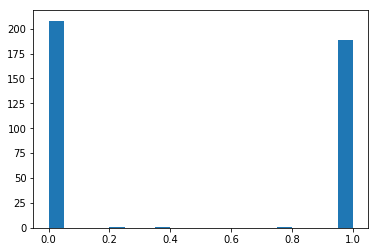

In [43]:
vf.assign_marginals()
plt.hist(vf.train_marginals, bins=20)
plt.show()

In [44]:
vague_idx = vf.find_vague_points(b=0.6, thresh=0.2)
incorrect_idx = vf.find_incorrect_points(b=0.6)
#TODO call the function, print TP/FP/F1/P/R etc in pandas format
1-np.shape(incorrect_idx)[0]/float(np.shape(val_ground)[0])

0.745

In [45]:
special_idx = list(set(list(np.concatenate((vague_idx,incorrect_idx)))))

In [46]:
syn = Synthesizer(val_primitive_matrix[special_idx,:], val_ground[special_idx])
hf, feat_combos = syn.generate_heuristics(cardinality=1)

In [47]:
#optional pruning
sort_idx = syn.prune_heuristics(hf,feat_combos, keep=3)
hf = [hf[i] for i in sort_idx]
feat_combos = [feat_combos[i] for i in sort_idx]

In [48]:
X_train = train_primitive_matrix[:,feat_combos]
L_train_new = syn.apply_heuristics(hf,X_train)

X_val = val_primitive_matrix[:,feat_combos]
L_val_new = syn.apply_heuristics(hf,X_val)

In [49]:
L_train_all = np.concatenate((L_train_all,L_train_new), axis=1)
L_val_all = np.concatenate((L_val_all,L_val_new), axis=1)

Inferred cardinality: 2


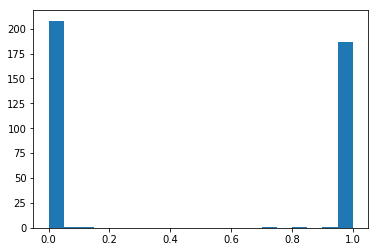

In [50]:
vf = Verifier(L_train_all, L_val_all, val_ground)

vf.train_gen_model()
vf.gen_model.learned_lf_stats()

vf.assign_marginals()
plt.hist(vf.train_marginals, bins=20)
plt.show()

In [51]:
vague_idx = vf.find_vague_points(b=0.6, thresh=0.2)
incorrect_idx = vf.find_incorrect_points(b=0.6)
#TODO call the function, print TP/FP/F1/P/R etc in pandas format
1-np.shape(incorrect_idx)[0]/float(np.shape(val_ground)[0])

0.74